# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import joblib
import warnings
import joblib
warnings.filterwarnings('ignore')

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [4]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

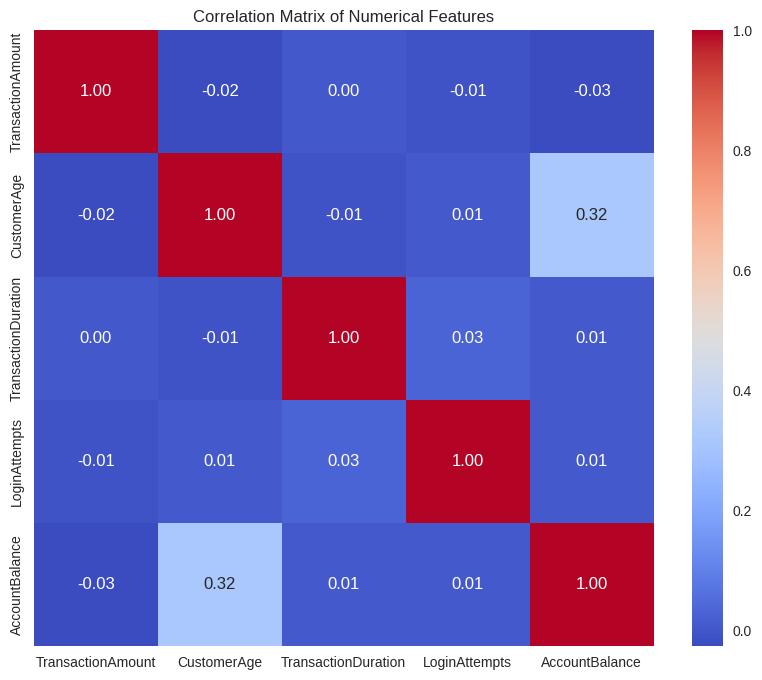

In [5]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

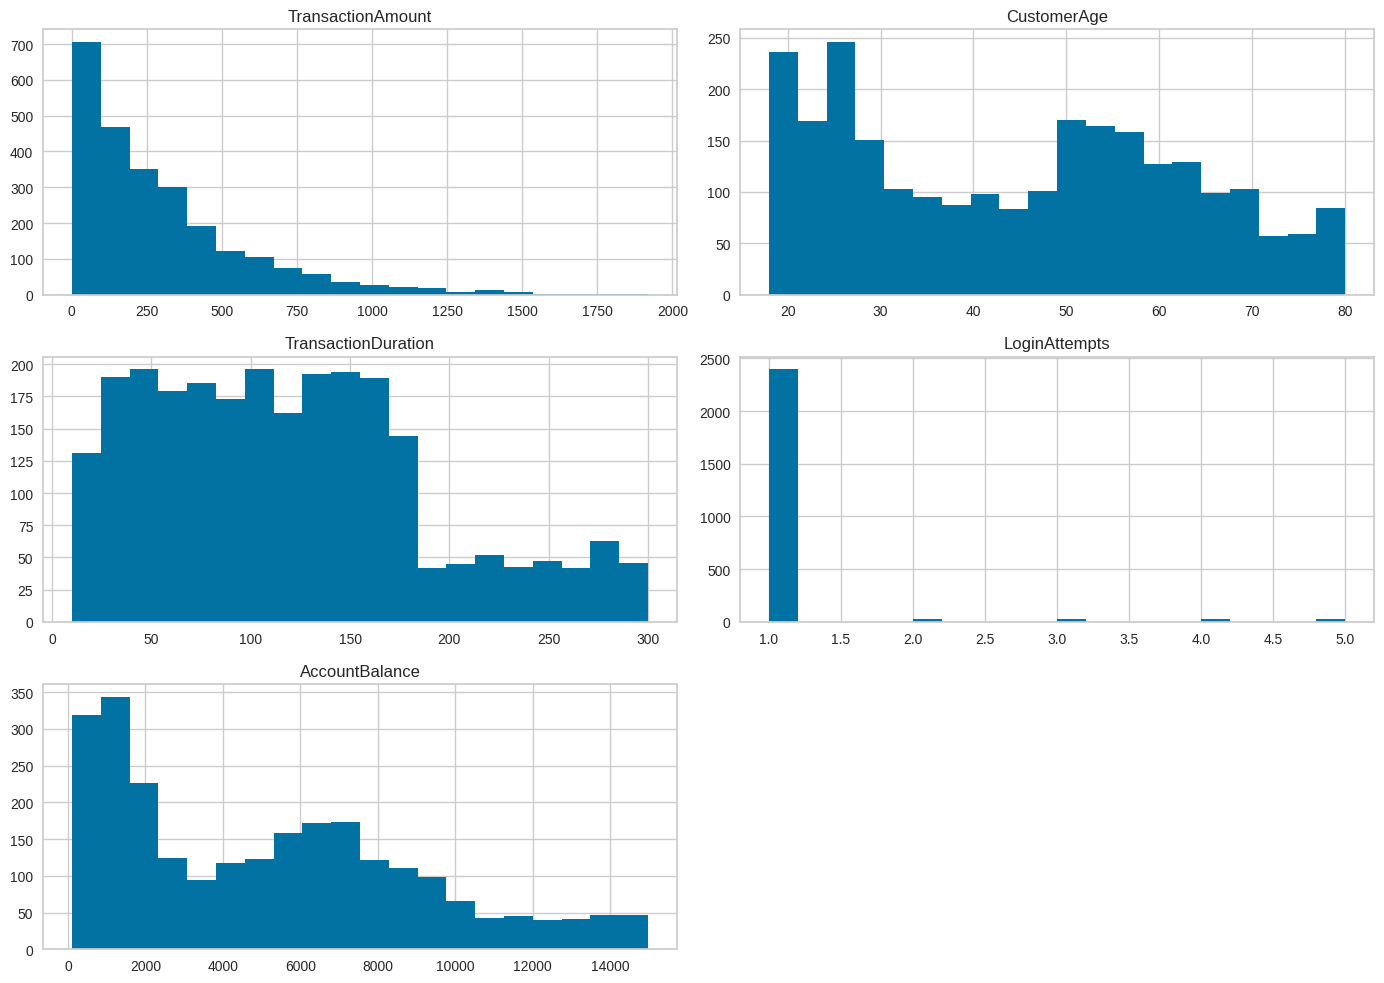

In [6]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numerical_features_for_hist = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
df[numerical_features_for_hist].hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

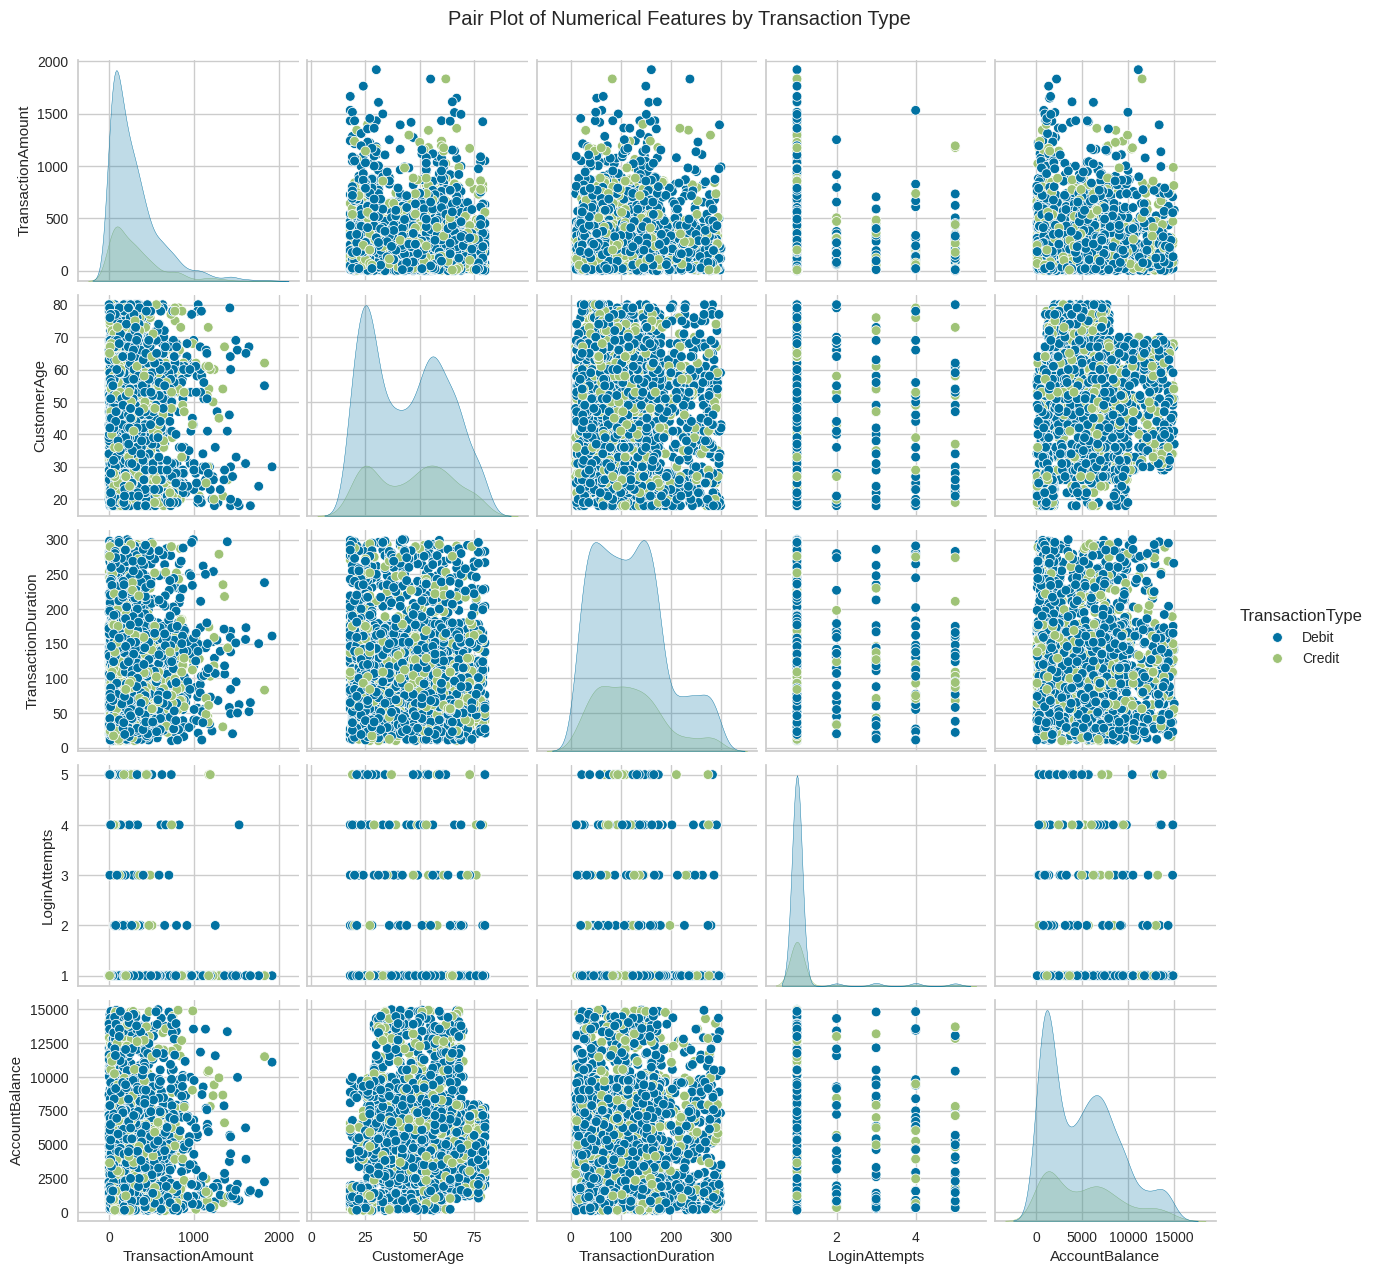

In [7]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Menggunakan TransactionType sebagai pembeda warna
sns.pairplot(df[numerical_features_for_hist + ['TransactionType']].dropna(), hue='TransactionType')
plt.suptitle('Pair Plot of Numerical Features by Transaction Type', y=1.02)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [8]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [9]:
df.duplicated().sum()

np.int64(21)

In [10]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
df_processed = df.copy()
# FIX: Definisikan kolom numerik secara eksplisit untuk menghindari tercampurnya kolom hasil encoding
numerical_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

scaler = MinMaxScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

print("\nData setelah scaling fitur numerik:")
df_processed.head()


Data setelah scaling fitur numerik:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [11]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# Strategi: Drop kolom ID yang tidak relevan, lalu imputasi sisanya
# Kolom yang tidak relevan untuk clustering
cols_to_drop = ['TransactionID', 'AccountID', 'TransactionDate', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate']
df_processed.drop(columns=cols_to_drop, inplace=True)

# Imputasi untuk kolom numerik dengan median (lebih tahan terhadap outlier)
num_imputer = SimpleImputer(strategy='median')
numerical_cols = df_processed.select_dtypes(include=np.number).columns.tolist()
df_processed[numerical_cols] = num_imputer.fit_transform(df_processed[numerical_cols])

# Imputasi untuk kolom kategorikal dengan modus (nilai paling sering muncul)
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = df_processed.select_dtypes(include='object').columns.tolist()
df_processed[categorical_cols] = cat_imputer.fit_transform(df_processed[categorical_cols])

print("Jumlah nilai null setelah imputasi:")
df_processed.isnull().sum()

Jumlah nilai null setelah imputasi:


,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [12]:
encoders = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    df_processed[col] = encoder.fit_transform(df_processed[col])
    encoders[col] = encoder

print("Data setelah encoding fitur kategorikal:")
df_processed.head()

Data setelah encoding fitur kategorikal:


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,70.0,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,68.0,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,19.0,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,26.0,3,0.051724,0.0,0.569198
4,0.006874,0,1,2,45.0,3,0.648276,0.0,0.492591


In [13]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.

df_processed.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [14]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_processed.dropna(inplace=True)

In [15]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_processed.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [16]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Menggunakan metode IQR capping untuk 'TransactionAmount' dan 'AccountBalance'
for col in ['TransactionAmount', 'AccountBalance']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers (mengganti nilai outlier dengan batas atas)
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print(f"Batas atas untuk outlier '{col}': {upper_bound:.2f}")

print("\nStatistik deskriptif setelah handling outlier:")
df[['TransactionAmount', 'AccountBalance']].describe()

Batas atas untuk outlier 'TransactionAmount': 910.80
Batas atas untuk outlier 'AccountBalance': 16924.63

Statistik deskriptif setelah handling outlier:


,TransactionAmount,AccountBalance
count,2511.000000,2510.000000
mean,284.764977,5113.438124
std,252.031349,3897.975861
min,0.260000,101.250000
25%,81.310000,1504.727500
50%,211.360000,4734.110000
75%,413.105000,7672.687500
max,910.797500,14977.990000


In [17]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
# Binning 'CustomerAge'
age_bins = [0, 30, 50, 100]
age_labels = ['Young Adult', 'Middle-Aged', 'Senior']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=age_bins, labels=age_labels, right=False)

# Menggabungkan AgeGroup yang sudah di-encode ke categorical_cols untuk diproses bersamaan
categorical_cols.append('AgeGroup')

# Drop kolom asli yang sudah di-binning
df.drop('CustomerAge', axis=1, inplace=True)
# Menghapus 'CustomerAge' dari daftar numerik
numerical_cols.remove('CustomerAge')

print("Hasil Binning pada Fitur 'CustomerAge':")
df[['AgeGroup']].head()

Hasil Binning pada Fitur 'CustomerAge':


,AgeGroup
0,Senior
1,Senior
2,Young Adult
3,Young Adult
4,NaN


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [18]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_processed.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000
mean,0.154642,0.776363,20.918424,0.989256,44.630720,1.520493,0.377539,0.030442,0.336969
std,0.151761,0.416765,12.193214,0.804721,17.741771,1.134504,0.240191,0.148702,0.260682
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043203,1.000000,11.000000,0.000000,27.000000,0.000000,0.182759,0.000000,0.095325
50%,0.110014,1.000000,21.000000,1.000000,45.000000,2.000000,0.351724,0.000000,0.311416
75%,0.213331,1.000000,31.000000,2.000000,59.000000,3.000000,0.520690,0.000000,0.506899
max,1.000000,1.000000,42.000000,2.000000,80.000000,3.000000,1.000000,1.000000,1.000000


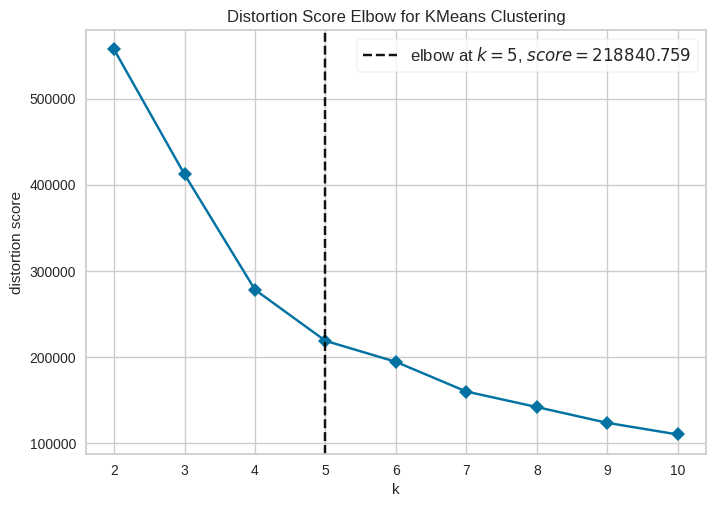

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans(random_state=42, n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=False)
visualizer.fit(df_processed)
visualizer.show()

In [20]:
# Menggunakan algoritma K-Means Clustering
# Berdasarkan elbow method, k=4 adalah jumlah cluster optimal.
k_optimal = visualizer.elbow_value_
model_kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init='auto')
model_kmeans.fit(df_processed)
df_processed['Cluster'] = model_kmeans.labels_

Jalankan cell code ini untuk menyimpan model kamu.

In [21]:
# Menyimpan model menggunakan joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [22]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(df_processed.drop('Cluster', axis=1), model_kmeans.labels_)
print(f'Silhouette Score for k={k_optimal}: {score:.4f}')

Silhouette Score for k=5: 0.4020


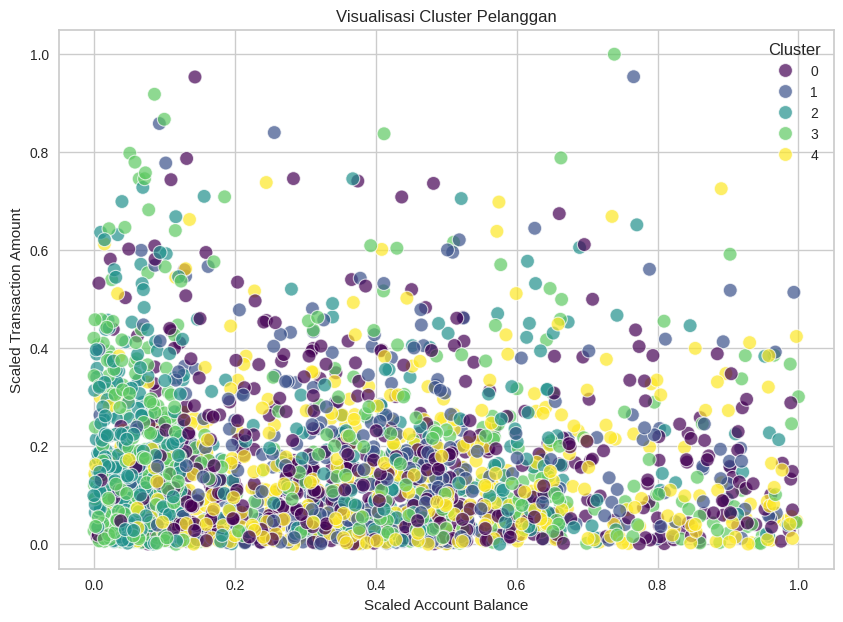

In [23]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 7))
# Memvisualisasikan dua fitur paling penting: Saldo Akun vs. Jumlah Transaksi
sns.scatterplot(data=df_processed, x='AccountBalance', y='TransactionAmount', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Visualisasi Cluster Pelanggan')
plt.xlabel('Scaled Account Balance')
plt.ylabel('Scaled Transaction Amount')
plt.legend(title='Cluster')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [24]:
# Membangun model menggunakan PCA.
X = df_processed.drop('Cluster', axis=1)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=k_optimal, random_state=42, n_init='auto')
kmeans_pca.fit(df_pca)
df_pca['Cluster'] = kmeans_pca.labels_

print("Data setelah PCA:")
df_pca.head()

Data setelah PCA:


,PCA1,PCA2,Cluster
0,24.736881,16.145767,4
1,23.631373,-4.919745,1
2,-25.725628,0.990580,2
3,-19.155175,11.277830,2
4,1.178183,-19.889129,1


In [25]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
- **Cluster 0: **
  - Rata-rata Jumlah Transaksi: Rp 302.20
  - Rata-rata Saldo Akun: Rp 6084.59
  - Pekerjaan Dominan: Retired
  - **Analisis:** Nasabah dalam cluster ini merupakan pensiunan berusia lanjut dengan saldo rekening yang tinggi dan aktivitas transaksi yang cukup stabil. Mereka lebih memilih menggunakan ATM, menunjukkan kemandirian namun tetap berpegang pada metode transaksi konvensional.      

- **Cluster 1: **
  - Rata-rata Jumlah Transaksi: Rp 307.47
  - Rata-rata Saldo Akun: Rp 5952.78
  - Pekerjaan Dominan: Retired
  - **Analisis:** Cluster ini mirip dengan Cluster 0, tapi dengan transaksi lebih besar dan cepat. Mereka tampak lebih aktif secara finansial.

- **Cluster 2: **
  - Rata-rata Jumlah Transaksi: Rp 314.61
  - Rata-rata Saldo Akun: Rp 3425.06
  - Pekerjaan Dominan: Student
  - **Analisis:** Cluster ini merupakan mahasiswa yang sangat aktif secara digital, cenderung impulsif dalam pengeluaran (jumlah transaksi tinggi tetapi saldo rendah).

- **Cluster 3: **
  - Rata-rata Jumlah Transaksi: Rp 300.74
  - Rata-rata Saldo Akun: Rp 4017.66
  - Pekerjaan Dominan: Student
  - **Analisis:** Cluster ini mirip dengan Cluster 2, tapi dengan transaksi yang lebih besar dan terkontrol dibandingkan cluster 2.

- **Cluster 4: **
  - Rata-rata Jumlah Transaksi: Rp 259.96
  - Rata-rata Saldo Akun: Rp 6458.17
  - Pekerjaan Dominan: Engineer
  - **Analisis:** Nasabah dewasa profesional dengan saldo tinggi namun transaksi cenderung lebih sedikit. Mereka lebih memilih datang langsung ke cabang untuk layanan kompleks.
  

In [26]:
# Melakukan export pada data sebelum inverse ke berkas data_clustering.csv
df_processed.to_csv('data_clustering.csv', index=False)

# Pisahkan kolom numerik dan kategorikal dari df_processed
numeric_cols_processed = df_processed.select_dtypes(include=[np.number]).columns.tolist()
if 'Cluster' in numeric_cols_processed:
    numeric_cols_processed.remove('Cluster')

categorical_cols_processed = df_processed.select_dtypes(include=['object']).columns.tolist()

# Agregasi untuk data yang sudah di-scaling dan encoding
agg_funcs_processed = {}
for col in numeric_cols_processed:
    agg_funcs_processed[col] = ['mean', 'min', 'max']

for col in categorical_cols_processed:
    agg_funcs_processed[col] = lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]

if len(agg_funcs_processed) > 0:
    cluster_analysis_processed = df_processed.groupby('Cluster').agg(agg_funcs_processed)
    print("Analisis Cluster pada Data Setelah Scaling dan Encoding:")
    print(cluster_analysis_processed)
else:
    print("Tidak ada kolom untuk dianalisis pada data processed")



Analisis Cluster pada Data Setelah Scaling dan Encoding:
        TransactionAmount                     TransactionType          \
                     mean       min       max            mean min max   
Cluster                                                                 
0                0.157356  0.000599  0.953561        0.740876   0   1   
1                0.160102  0.001173  0.954092        0.765789   0   1   
2                0.163821  0.000099  0.745796        0.811538   0   1   
3                0.156592  0.000000  1.000000        0.789565   0   1   
4                0.135343  0.000031  0.738166        0.771429   0   1   

          Location           Channel  ... CustomerOccupation  \
              mean min max      mean  ...                max   
Cluster                               ...                      
0        32.361314  20  42  0.948905  ...                  3   
1        10.836842   0  25  0.973684  ...                  3   
2        10.511538   0  22  1.032692  

## **a. Interpretasi Hasil Scaling dan Encoding**
- **Cluster 0: **
  - Rata-rata TransactionAmount (scaled): 0.157356
  -  Rata-rata AccountBalance (scaled): 0.402195
  - Rata-rata TransactionDuration (scaled): 0.366543
  - Rata-rata LoginAttempts (scaled): 0.033759
  - **Analisis:** Cluster ini memiliki nilai transaksi yang rendah hingga sedang dengan saldo akun yang cukup tinggi. Durasi transaksi moderat dengan login attempts yang sangat rendah, menunjukkan pengguna yang berpengalaman dan jarang mengalami kesulitan akses.    

- **Cluster 1: **
  - Rata-rata TransactionAmount (scaled): 0.160102
  - Rata-rata AccountBalance (scaled): 0.393334
  - Rata-rata TransactionDuration (scaled): 0.376697
  - Rata-rata LoginAttempts (scaled): 0.032895
  - **Analisis:** Cluster ini mirip dengan Cluster 0 namun dengan sedikit peningkatan pada nilai transaksi dan durasi. Saldo akun sedikit lebih rendah, menunjukkan kelompok yang aktif bertransaksi dengan tingkat kepercayaan sistem yang tinggi.

- **Cluster 2: **
  - Rata-rata TransactionAmount (scaled): 0.163821
  - Rata-rata AccountBalance (scaled): 0.223423
  - Rata-rata TransactionDuration (scaled): 0.377374
  - Rata-rata LoginAttempts (scaled): 0.037981
  - **Analisis:** Cluster ini memiliki nilai transaksi yang relatif tinggi namun saldo akun yang paling rendah di antara semua cluster. Login attempts yang lebih tinggi menunjukkan pengguna yang mungkin kurang familiar dengan sistem atau sering mengalami kendala teknis.


- **Cluster 3: **
  - Rata-rata TransactionAmount (scaled): 0.156592
  - Rata-rata AccountBalance (scaled): 0.263257
  - Rata-rata TransactionDuration (scaled): 0.374663
  - Rata-rata LoginAttempts (scaled): 0.021739
  - **Analisis:** Cluster ini memiliki nilai transaksi sedang dengan saldo akun yang rendah hingga sedang. Login attempts yang rendah menunjukkan pengguna yang cukup terampil dalam menggunakan sistem meskipun saldo tidak terlalu tinggi.

- **Cluster 4: **
  - Rata-rata TransactionAmount (scaled): 0.153343
  - Rata-rata AccountBalance (scaled): 0.427306
  - Rata-rata TransactionDuration (scaled): 0.394939
  - Rata-rata LoginAttempts (scaled): 0.027841
  - **Analisis:** Cluster ini memiliki nilai transaksi yang paling rendah namun saldo akun yang paling tinggi. Durasi transaksi yang lebih panjang dan login attempts yang rendah menunjukkan pengguna yang hati-hati dan berpengalaman dalam bertransaksi.

In [27]:
# Buat salinan dari dataframe original
df_inverse = df.copy()
df_inverse = df_inverse.loc[df_processed.index]
df_inverse['Cluster'] = df_processed['Cluster']

# Lakukan inverse transform pada kolom yang di-scaling
df_inverse[numerical_cols] = scaler.inverse_transform(df_processed[numerical_cols])

# Lakukan inverse transform untuk kolom kategorikal
for col in categorical_cols:
    if col in encoders:
        le = encoders[col]
        df_inverse[col] = le.inverse_transform(df_processed[col].astype(int))

print("Data setelah proses inverse transform (5 baris pertama):")
display(df_inverse.head())

df_inverse.rename(columns={'Cluster': 'Target'}, inplace=True)

# Definisikan fungsi agregasi untuk interpretasi
numeric_agg = ['mean', 'min', 'max']
category_agg = lambda x: x.mode().iloc[0] if not x.mode().empty else None

agg_funcs = {col: numeric_agg for col in numerical_cols}
agg_funcs.update({col: category_agg for col in categorical_cols})

# Lakukan analisis agregat
cluster_interpretation = df_inverse.groupby('Target').agg(agg_funcs)
print("\nAnalisis Agregat per Cluster (Nilai Asli):")
display(cluster_interpretation)


Data setelah proses inverse transform (5 baris pertama):


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Senior,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,Senior,1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Young Adult,3
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Young Adult,3
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,NaN,4



Analisis Agregat per Cluster (Nilai Asli):


TransactionAmount                TransactionDuration               \
                    mean   min      max                mean   min    max   
Target                                                                     
0             302.202993  1.41  1830.00          116.297445  11.0  296.0   
1             307.472079  2.51  1831.02          119.242105  10.0  293.0   
2             314.607365  0.45  1431.33          119.438462  10.0  298.0   
3             300.736522  0.26  1919.11          118.652174  10.0  299.0   
4             259.963755  0.32  1416.69          124.271429  10.0  300.0   

       LoginAttempts           AccountBalance                    \
                mean  min  max           mean     min       max   
Target                                                            
0           1.135036  1.0  5.0    6084.593120  173.70  14904.90   
1           1.131579  1.0  5.0    5952.775763  207.10  14881.77   
2           1.151923  1.0  5.0    3425.056135  101.25  14765.41   
3           1.086957  1.0  5.0    4017.657078  102.20  14977.99   
4           1.108163  1.0  5.0    6458.167286  120.89  14942.78   

       TransactionType      Location  Channel CustomerOccupation     AgeGroup  
              <lambda>      <lambda> <lambda>           <lambda>     <lambda>  
Target                                                                         
0                Debit  Philadelphia      ATM            Retired       Senior  
1                Debit        Austin   Branch            Retired       Senior  
2                Debit    Fort Worth   Online            Student  Young Adult  
3                Debit        Tucson   Branch            Student  Young Adult  
4                Debit    Fort Worth   Branch           Engineer  Middle-Aged

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [30]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [32]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [33]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [34]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [35]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)